The ratio calculated here is

OPT_EXER_NUM / (OPT_EXER_NUM + OPT_UNEX_EXER_NUM)

* OPT_EXER_NUM: Number of options exercised by the executive during the year.
* OPT_UNEX_EXER_NUM: The aggregate number of unexercised options held by the executive at fiscal year end that were vested.

Note that if the denomiator is zero the executive holds no options that can be exercised. Therefore I drop that executive as an observation.

In [12]:
%reset -f
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_main = pd.read_csv('anncomp_full_data.csv')

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (77,80,96) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [13]:
pd.options.mode.chained_assignment = None  # default='warn'

df_small = df_main[['YEAR', 'EXEC_FULLNAME', 'SIC', 'SICDESC', 'OPT_EXER_NUM', 'OPT_UNEX_EXER_NUM', 'OPT_UNEX_UNEXER_NUM']]
#drop any observations if they have na for 'OPT_EXER_NUM', 'OPT_UNEX_EXER_NUM', 'OPT_UNEX_UNEXER_NUM'
df_small = df_small.dropna(axis=0, subset=('OPT_EXER_NUM', 'OPT_UNEX_EXER_NUM', 'OPT_UNEX_UNEXER_NUM'))

all_indus = df_small[['YEAR', 'EXEC_FULLNAME','OPT_EXER_NUM', 'OPT_UNEX_EXER_NUM', 'OPT_UNEX_UNEXER_NUM']]
all_indus['denom'] = all_indus['OPT_EXER_NUM'] + all_indus['OPT_UNEX_EXER_NUM']

#drop observations where an executive has no options at all
all_indus = all_indus[all_indus.denom !=0]

#make the ratio. if all_indus['denom'] is zero then ratio is na. I change it back to zero.
#all_indus['ratio'] = (all_indus['OPT_EXER_NUM']/all_indus['denom']).fillna(0)
all_indus['ratio'] = (all_indus['OPT_EXER_NUM']/all_indus['denom'])


for x in range(1995,2020):
    shell = all_indus[all_indus['YEAR'] == x]
    globals()['distribution_year%s' % x] = shell['ratio']
    
                      



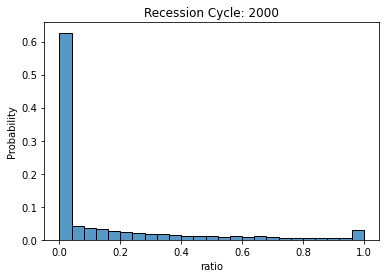

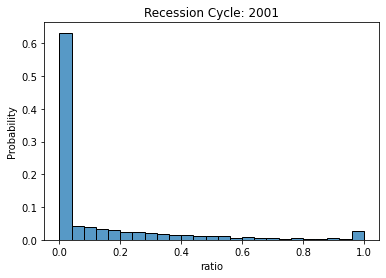

In [14]:
# Recessions 2000 & 2001
sns.histplot(data=distribution_year2000, stat="probability", bins=25)
plt.title('Recession Cycle: 2000')
plt.show()
sns.histplot(data=distribution_year2001, stat="probability", bins=25)
plt.title('Recession Cycle: 2001')
plt.show()

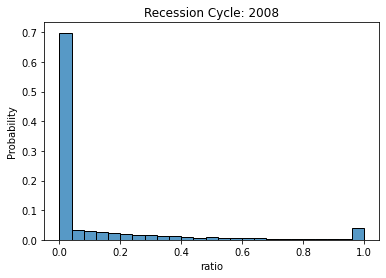

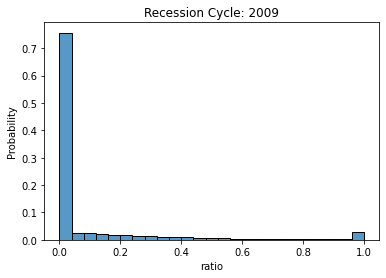

In [15]:
# Recessions 2008 & 2009
sns.histplot(data=distribution_year2008, stat="probability", bins=25)
plt.title('Recession Cycle: 2008')
plt.show()
sns.histplot(data=distribution_year2009, stat="probability", bins=25)
plt.title('Recession Cycle: 2009')
plt.show()

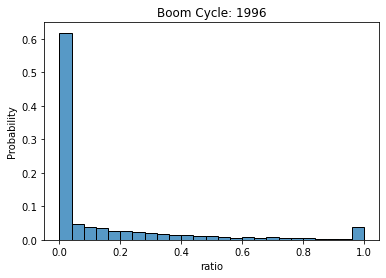

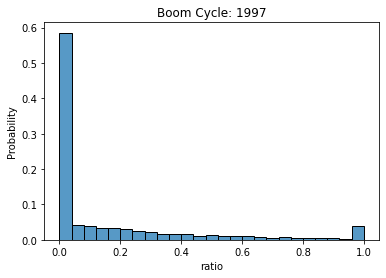

In [16]:
# Booms 1996 & 1997
sns.histplot(data=distribution_year1996, stat="probability", bins=25)
plt.title('Boom Cycle: 1996')
plt.show()
sns.histplot(data=distribution_year1997, stat="probability", bins=25)
plt.title('Boom Cycle: 1997')
plt.show()

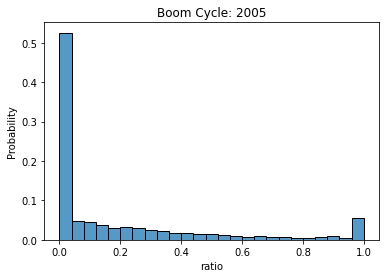

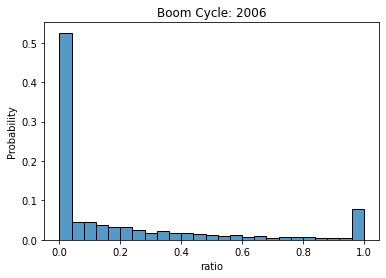

In [17]:
# Booms 2005 & 2006
sns.histplot(data=distribution_year2005, stat="probability", bins=25)
plt.title('Boom Cycle: 2005')
plt.show()
sns.histplot(data=distribution_year2006, stat="probability", bins=25)
plt.title('Boom Cycle: 2006')
plt.show()

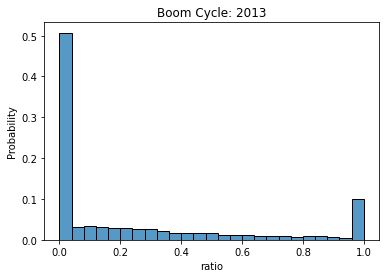

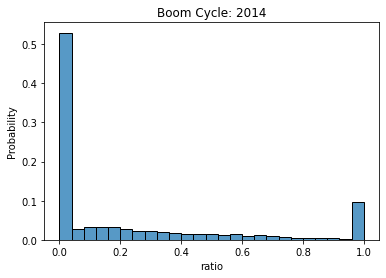

In [18]:
#booms 2013 and 2014
sns.histplot(data=distribution_year2013, stat="probability", bins=25)
plt.title('Boom Cycle: 2013')
plt.show()
sns.histplot(data=distribution_year2014, stat="probability", bins=25)
plt.title('Boom Cycle: 2014')
plt.show()